# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset 

In [2]:
df = pd.read_csv('BBC News Train.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


#  Data Preprocessing 

In [3]:
df.drop('ArticleId', axis=1, inplace=True)

In [4]:
# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = ''.join([c for c in text if c.isalpha() or c.isspace()]).lower()
    # Tokenize the text into words
    words = text.split()
    # Remove stop words and stem the remaining words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Convert the processed words back to a string
    return ' '.join(words)

df['Text'] = df['Text'].apply(preprocess_text)

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Category']

In [7]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

# Data Splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_test

941     entertainment
297          politics
271          politics
774              tech
420              tech
            ...      
1144         business
1309         business
1444    entertainment
949              tech
1212    entertainment
Name: Category, Length: 298, dtype: object

# Naive Bayes model

### Training the Model


In [12]:
X_train.

<1192x17829 sparse matrix of type '<class 'numpy.int64'>'
	with 167819 stored elements in Compressed Sparse Row format>

In [13]:
y_train

1166            sport
1106         business
538          politics
439             sport
1478         politics
            ...      
1130         politics
1294         business
860          politics
1459    entertainment
1126            sport
Name: Category, Length: 1192, dtype: object

In [11]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

### Evaluate the performance of the model on the testing set

In [14]:
X_test

<298x17829 sparse matrix of type '<class 'numpy.int64'>'
	with 42258 stored elements in Compressed Sparse Row format>

In [9]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9832214765100671
Precision: 0.9834864005651712
Recall: 0.9832214765100671


# Allow the user to input a new news article and predict its category

In [11]:
while True:
    article = input("Enter a news article (type 'exit' to quit): ")
    if article == 'exit':
        break
    article = preprocess_text(article)
    article_vectorized = vectorizer.transform([article])
    category = nb_model.predict(article_vectorized)[0]
    print(f"Predicted category:{category}")

Enter a news article (type 'exit' to quit): exit


# Data visualization

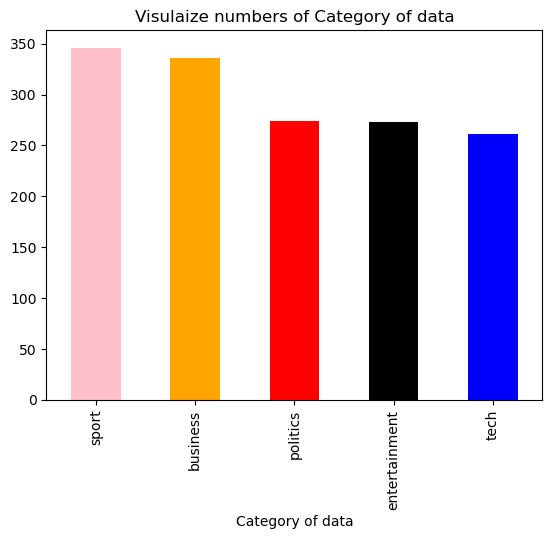

In [22]:
value.plot(kind = "bar", color = ["pink", "orange", "red", "black", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

<class 'pandas.core.series.Series'>


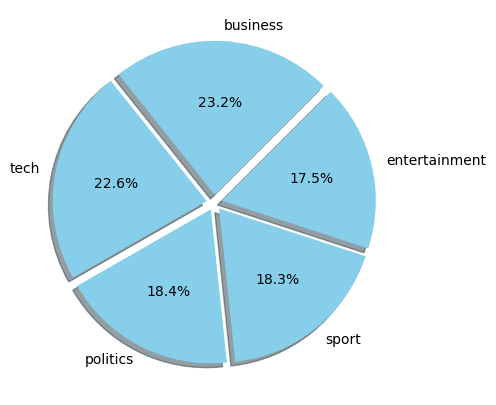

In [18]:
value=df["Category"].value_counts()
print(type(value))
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
pie = plt.pie(value, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0,0))